#### EP4130: Data Science Analysis

#### Assignment 1

#### Tanmay Goyal- AI20BTECH11021

In [2]:
# importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

Question 1

Create 1000 draws from a normal distribution of mean of 1.5 and standard
deviation of 0.5. Plot the pdf. Calculate the sample mean, variance,
skewness, kurtosis as well as standard deviation using MAD and $\sigma_G$ of
these samples.

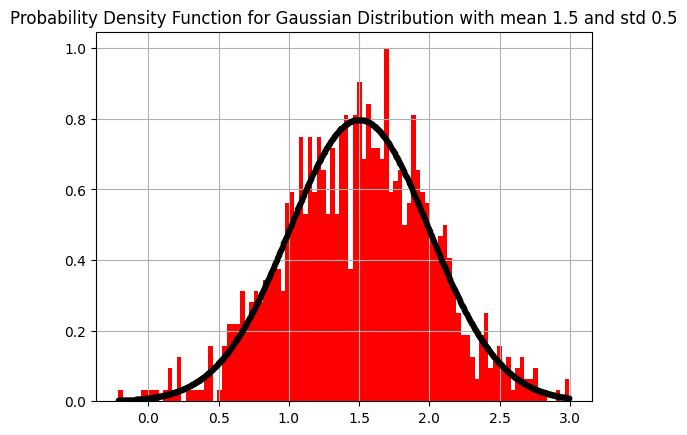

The sample mean is :  1.4952561874649557
The sample variance is :  0.2719367469600845
The skewness of the data is :  -0.06187379602607477
The kurtosis of the data is :  -0.04591439179552115
The MAD of the data is :  0.36667121328015106
The standard deviation using MAD is :  0.5434067380811839
Sigma_G is defined as 0.7413(q75 - q25). 
The sigma_G for this data is :  0.5401798453855469


In [14]:
points = np.random.normal(loc = 1.5 , scale = 0.5 , size = 1000)
max_point = np.max(points)
min_point = np.min(points)
x = np.linspace(min_point, max_point, 1000)

# generating the Gaussian PDF
y = sp.stats.norm.pdf(x, 1.5, 0.5)

# plotting the histogram
plt.hist(points, 100 , density = True , color = 'red')
plt.plot(x , y , 'k.-')
plt.title("Probability Density Function for Gaussian Distribution with mean 1.5 and std 0.5")
plt.grid(True)
plt.show()

# printing the required data
print("The sample mean is : " , np.mean(points))
print("The sample variance is : " , np.var(points))
print("The skewness of the data is : " , sp.stats.skew(points))
print("The kurtosis of the data is : " , sp.stats.kurtosis(points))
print("The MAD of the data is : " , sp.stats.median_abs_deviation(points))
print("The standard deviation using MAD is : " , sp.stats.median_abs_deviation(points) * 1.482)
print("Sigma_G is defined as 0.7413(q75 - q25). \nThe sigma_G for this data is : " \
    , 0.7413 * (np.percentile(points, 75) - np.percentile(points, 25)))

Question 2

Plot a Cauchy Distribution with $\mu=0$ and $\gamma=1.5$ on top of a normal distribution with $\mu=0$ and $\sigma=1.5$.

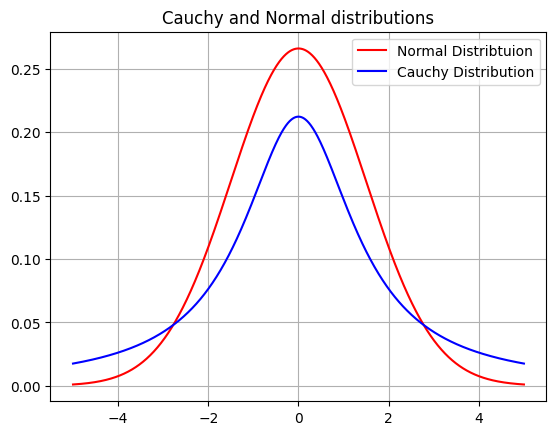

In [4]:
x = np.linspace(-5 , 5 , 1000)

# generating the Gaussian PDF
normal = sp.stats.norm.pdf(x , loc = 0 , scale = 1.5)

# generating the Cauchy PDF
cauchy = sp.stats.cauchy.pdf(x , loc = 0 , scale = 1.5)

# plotting the PDFs
plt.plot(x , normal , 'r-' , label = 'Normal Distribtuion')
plt.plot(x , cauchy , 'b-' , label = 'Cauchy Distribution')
plt.grid(True)
plt.legend()
plt.title("Cauchy and Normal distributions")
plt.show()

Question 3

Plot a Poisson Distribution with mean 5 on top of a Gaussian distribution with $\mu = 5$ and $\sigma = \sqrt{5}$.

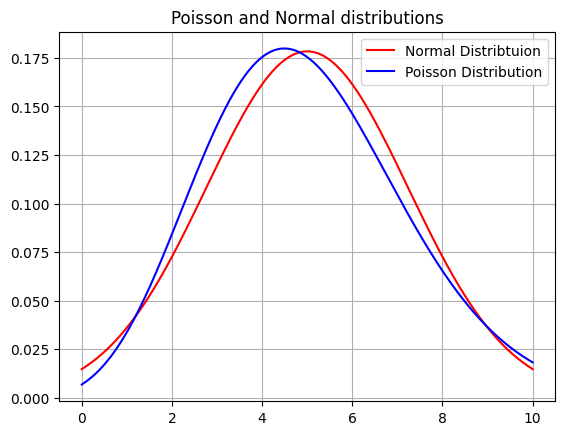

In [5]:
x = np.linspace(0 , 10 , 1000)

# generating the Gaussian PDF
normal = sp.stats.norm.pdf(x , loc = 5 , scale = 5 ** 0.5)

# generating the Poisson PMF
Poisson = sp.stats.poisson.pmf(x , mu = 5)

# plotting the distributions
plt.plot(x , normal , 'r-' , label = 'Normal Distribtuion')
plt.plot(x , Poisson ,'b-', label = 'Poisson Distribution')
plt.grid(True)
plt.legend()
plt.title("Poisson and Normal distributions")
plt.show()

Question 4

The following were the measurements of mean lifetime of K meson (in $10^{-10}$ seconds)

$0.8920\pm0.00044$

$0.881\pm0.009$

$0.8913\pm0.00032$

$0.9837\pm0.00048$

$0.8958\pm0.00045$

Calculate the weighted mean lifetime and uncertainty of the
mean.

Answer

We know, that if $\sigma_i$ represents the uncertainity in an observation $x_i$, then:

Mean of observations: 

$\bar{x} = \frac{\sum\limits_{i=1}^N \frac{x_i}{\sigma_i^2}}{\sum\limits_{i=1}^N \frac{1}{\sigma_i^2}}$

Mean of uncertainities:

$\sigma_{\bar{x}}^2 = \frac{1}{\sum\limits_{i=1}^N \frac{1}{\sigma_i^2}}$

We code the above mentioned formulae

In [6]:
lifetimes = np.array([0.8920 , 0.881 , 0.8913 , 0.9837 , 0.8958])
uncertainity = np.array([0.00044 , 0.009 , 0.00032 , 0.00048 , 0.00045])

# calculating mean_lifetime
mean_lifetime = np.sum(np.array([lifetimes[i] / uncertainity[i]**2 for i in \
    range(len(lifetimes))])) / np.sum(np.array([1/ uncertainity[i]**2 for i in range(len(lifetimes))]))

# calculating mean_uncertainity
mean_uncertainity = np.sqrt(1 / np.sum(np.array([1/ uncertainity[i]**2 for i in range(len(lifetimes))])))

print("The mean lifetime is : " , mean_lifetime)
print("The mean uncertainity is : " , mean_uncertainity)

The mean lifetime is :  0.9089185199574897
The mean uncertainity is :  0.00020318737026848627


Question 5

Draw a histogram of the eccentricities of the exo planets, and use the Box-Cox transformation to Gaussianise it.

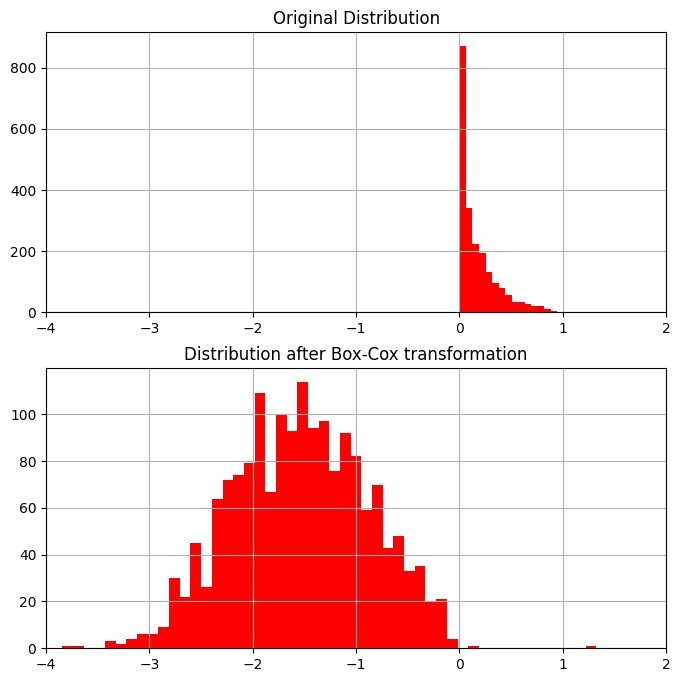

In [7]:
df = pd.read_csv("exoplanet.eu_catalog.csv")
ecc = df['eccentricity']
ecc = ecc.dropna()      # dropping all NaN values
converted_ecc , _ = sp.stats.boxcox(ecc[ecc > 0])   # since it requires non-zero eccentricities

# drawing the plot of original distribution
plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.hist(ecc , bins = 50 , color = 'red')
plt.title("Original Distribution")
plt.xlim(-4,2)
plt.grid(True)

# plotting the distribution after Box-Cox transformation
plt.subplot(2,1,2)
plt.hist(converted_ecc , bins=50 , color = 'red') 
plt.title("Distribution after Box-Cox transformation")
plt.grid(True)
plt.xlim(-4,2)

plt.show()